In [1]:
!python -V

Python 3.8.3


In [2]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import  mean_squared_error

In [4]:
#read data
df = pd.read_parquet('./data/green_tripdata_2022-01.parquet')

In [5]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [6]:
# calculate duration in  minutes
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() /60)

df = df[(df.duration>=1) & (df.duration<=60)]

categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)

In [7]:
#create dictionary
train_dict= df[categorical+numerical].to_dict(orient='records')
dv= DictVectorizer()
X_train =dv.fit_transform(train_dict)

target ='duration'
Y_train = df[target].values # trim to remove extra zeros

lr = LinearRegression()
lr.fit(X_train, Y_train)

y_predict = lr.predict(X_train)


mean_squared_error(Y_train,y_predict, squared=False)


7.652810588274314

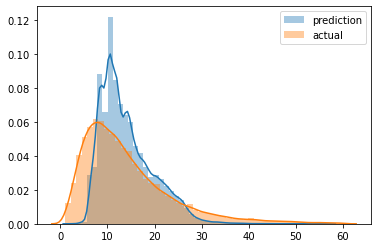

In [8]:
sns.distplot(y_predict, label='prediction')
sns.distplot(Y_train, label='actual')

plt.legend()

In [79]:
def read_data(filename):
    if filename.endswith('csv'):
        df = pd.read_csv(filename)
        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('parquet'):
        df = pd.read_parquet(filename)
        
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    df = df[(df.duration >=1) & (df.duration <=60)]
    categorical = ['PULocationID','DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df


In [80]:
df_train = read_data('./data/green_tripdata_2022-02.parquet')
df_test = read_data('./data/green_tripdata_2022-01.parquet')

In [81]:
len(df_train), len(df_test)

(66097, 59603)

In [92]:
df_test.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,0.0,0.0,None,0.3,4.8,2.0,1.0,0.0,1.200000,42_42
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,0.0,0.0,None,0.3,10.8,2.0,1.0,0.0,8.716667,116_41


In [104]:
categorical = ['PULocationID','DOLocationID']
df_train['PU_DO'] = df_train[categorical].astype(str)
df_test['PU_DO'] = df_test[categorical].astype(str)


In [109]:
categorical = ['PU_DO']
numerical =['trip_distance']

dv = DictVectorizer()
train_dict = df_train[categorical+numerical].to_dict(orient='records')
X_train= dv.fit_transform(train_dict)

test_dict = df_test[categorical+numerical].to_dict(orient='records')
X_test= dv.transform(test_dict)

In [110]:
df_train

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,2,2022-02-01 00:20:21,2022-02-01 00:24:30,N,1.0,43,238,1.0,1.16,5.50,...,1.02,0.0,None,0.3,7.82,1.0,1.0,0.00,4.150000,43
1,2,2022-02-01 00:32:26,2022-02-01 00:35:31,N,1.0,166,24,1.0,0.57,4.50,...,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00,3.083333,166
2,1,2022-02-01 00:17:27,2022-02-01 00:44:44,N,1.0,226,219,1.0,0.00,42.20,...,0.00,0.0,None,0.3,43.00,1.0,1.0,0.00,27.283333,226
3,2,2022-02-01 00:45:37,2022-02-01 01:27:16,N,1.0,89,83,1.0,16.62,49.00,...,0.00,0.0,None,0.3,50.30,2.0,1.0,0.00,41.650000,89
4,2,2022-02-01 00:06:46,2022-02-01 00:30:06,N,1.0,7,238,1.0,5.97,21.00,...,4.50,0.0,None,0.3,29.55,1.0,1.0,2.75,23.333333,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69394,2,2022-02-28 23:27:00,2022-02-28 23:38:00,None,NaN,65,87,NaN,2.61,13.60,...,3.66,0.0,None,0.3,20.31,NaN,NaN,NaN,11.000000,65
69395,2,2022-02-28 23:59:00,2022-03-01 00:10:00,None,NaN,97,231,NaN,2.88,12.07,...,3.00,0.0,None,0.3,18.12,NaN,NaN,NaN,11.000000,97
69396,2,2022-02-28 23:18:00,2022-02-28 23:27:00,None,NaN,74,116,NaN,2.22,10.68,...,1.22,0.0,None,0.3,12.20,NaN,NaN,NaN,9.000000,74
69397,2,2022-02-28 23:31:00,2022-02-28 23:39:00,None,NaN,42,69,NaN,1.59,8.88,...,0.00,0.0,None,0.3,9.18,NaN,NaN,NaN,8.000000,42


In [111]:
target ='duration'
Y_train = df_train[target].values
Y_test = df_test[target].values


In [113]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

y_predict= lr.predict(X_test)
mean_squared_error(Y_test, y_predict, squared=False)

9.012239579259075

In [115]:
lr = Lasso(0.01)
lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_test)

mean_squared_error(Y_test, Y_predict, squared=False)


9.1291868303698